# BART RIDERSHIP in the past twelve years

### Project Brief

Project outline: 

Target audience: Bart Board of Directors, City of San Francisco, SF Downtown Merchants Association

- Research question: With the growth in rideshare options, Covid-19 shelter-in-place mandates, and hybrid work from home options for work, where is Bart Ridership, specifically for SF Downtown Financial District, today?
    - How can this help inform City Planning and overall direction of this commercial area?
    - What are some opportunities to increase use? 
- Thorough exploratory data analysis
    - Overall trend in ridership in the past 12 years (rides by year). Visualization and hard figures. 
    - Show the drop in ridership during Covid shelter inplace mandate. 2019 - 2023 trajectory, month by month
    - Identify stations whose relative recovery does not match others. (compared to others): Percentage riders 2023 vs 2019 by station. Mean and Std. Are there any station outliers? (Q: Do this on the month or year)
    - SF Downtown stations analysis: Embarcadero, New Montgomery, Powell, and Civic Center
        - Distribution. Avg weekday rides to and from stations (2019 vs. 2023). Visualize how different the weekly distribution is.
        - Speak to weekday vs weekend use.
- Visualizations to support your findings
- Conclusions, Recommendations, and Future Work
    - Comment on where use is heading.
    - Future work: analyses whether rideshare data reflect these trends. Is it truly that people are commuting less or are they taking alternative forms of transportation. As the Bart and City, what can they to bring riders to downtown? 

How do I deel with a large data set? 12 of them?
Github

In [251]:
import pandas as pd
import numpy as np
import random
import datetime as dt
import seaborn as sns
import plotly.express as px

#### DOCS

In [6]:
bart = pd.read_csv('date-hour-soo-dest-2011.csv')

In [173]:
bart_summary = []
for i in list(range(2011,2024,1)):
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    bart_summary.append(df.groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index())
    
trips_month = pd.concat(bart_summary)[['Year','Month Name','Month','Trip Count']].reset_index(
).groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index()


In [196]:
trips_month = pd.concat(bart_summary)[['Year','Month Name','Month','Trip Count']].reset_index(
).groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month']).reset_index()

In [204]:
#trips_month.sort_values(['Year','Month'], inplace = True)
trips_month['Date'] = trips_month['Month Name'] + " " + trips_month['Year'].astype(str)

In [205]:
trips_month

,index,Year,Month Name,Month,Trip Count,Date
0,4,2011,January,1,8203563,January 2011
1,3,2011,February,2,7933264,February 2011
2,7,2011,March,3,9049039,March 2011
3,0,2011,April,4,8824840,April 2011
4,8,2011,May,5,8940380,May 2011
...,...,...,...,...,...,...
144,146,2023,January,1,3417241,January 2023
145,145,2023,February,2,3581426,February 2023
146,147,2023,March,3,4116038,March 2023
147,144,2023,April,4,4022389,April 2023


In [191]:
trips_month

,Year,Month Name,Month,Trip Count
4,2011,January,1,8203563
3,2011,February,2,7933264
7,2011,March,3,9049039
0,2011,April,4,8824840
8,2011,May,5,8940380
...,...,...,...,...
146,2023,January,1,3417241
145,2023,February,2,3581426
147,2023,March,3,4116038
144,2023,April,4,4022389


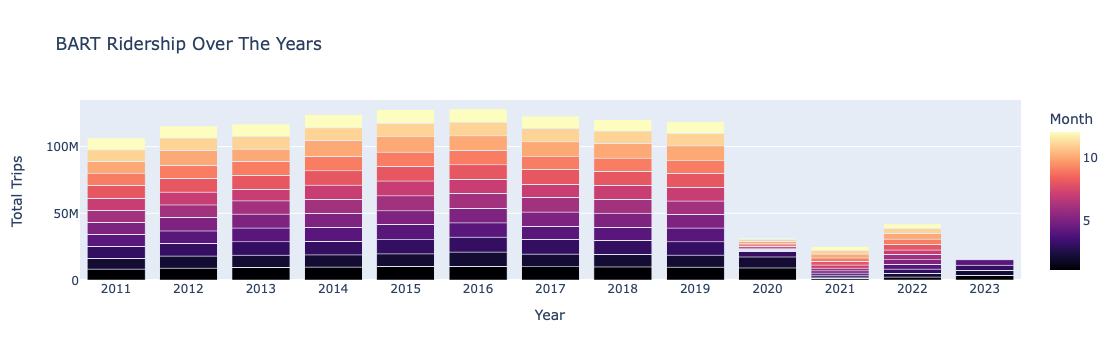

In [206]:
trend = px.bar(trips_month, x='Year', 
             y='Trip Count', color = "Month", 
             labels={"Trip Count":"Total Trips"}, 
             title = "BART Ridership Over The Years",
             color_continuous_scale="Magma",
            )
trend.update_xaxes(type = 'category')
trend.show()

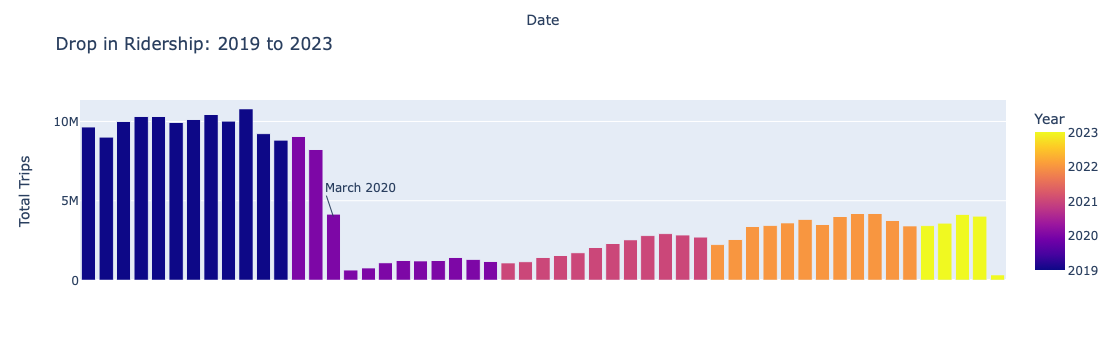

In [230]:
# trips_month[trips_month['Year'] >= 2023]
month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
             y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
             title = "Drop in Ridership: 2019 to 2023", color = 'Year')
month.update_xaxes(showticklabels=False)
month.add_annotation(
    x="March 2020", y = 4000000,
    text="March 2020",
    showarrow=True,
    xanchor="left")
#month.add_hline(y=10008025)
month.show()

In [228]:
trips_month.groupby(['Year','Month'])['Trip Count'].sum().loc[2011:2019,].mean()

10008025.231481481

In [231]:
bart2019 = pd.read_csv('date-hour-soo-dest-2019.csv')

In [232]:
bart2019

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2019-01-01,0,12TH,12TH,3
1,2019-01-01,0,12TH,16TH,4
2,2019-01-01,0,12TH,ANTC,1
3,2019-01-01,0,12TH,BAYF,1
4,2019-01-01,0,12TH,CIVC,2
...,...,...,...,...,...
10114280,2019-12-31,23,WOAK,MONT,59
10114281,2019-12-31,23,WOAK,PCTR,1
10114282,2019-12-31,23,WOAK,POWL,13
10114283,2019-12-31,23,WOAK,ROCK,2


In [122]:
bart.groupby([pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.year, pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.month_name()])['Trip Count'].sum().reset_index()

ValueError: cannot insert Date, already exists

In [70]:
working.groupby(['Year','Month'])['Trip Count'].sum().reset_index()

,Year,Month,Trip Count
0,2011,1,8203563
1,2011,2,7933264
2,2011,3,9049039
3,2011,4,8824840
4,2011,5,8940380
5,2011,6,9210691
6,2011,7,8894724
7,2011,8,9631831
8,2011,9,9382343
9,2011,10,8842417


In [45]:
pd.concat(bart_summary)[['Month','Trip Count']].reset_index()

,index,Month,Trip Count
0,0,1,8203563
1,1,2,7933264
2,2,3,9049039
3,3,4,8824840
4,4,5,8940380
5,5,6,9210691
6,6,7,8894724
7,7,8,9631831
8,8,9,9382343
9,9,10,8842417


#### Origin Analysis

In [263]:
station_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    station_summary.append(df.groupby(['Year','Month Name','Month','Origin Station'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month']).reset_index().drop(columns = ['index']))
    
#station_activity = pd.concat(station_summary)#[['Year','Month Name','Month','Trip Count']].reset_index(
# ).groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index()


In [443]:
origin_stations = station_summary[0].merge(station_summary[1][station_summary[1]['Month']>4], 
                         how = 'left', left_on= ['Month','Origin Station'], right_on = ['Month','Origin Station'], 
                         suffixes = ['_2019','_2022'])
origin_stations = origin_stations.merge(station_summary[2], 
                         how = 'left', left_on= ['Month','Origin Station'], right_on = ['Month','Origin Station'], 
                         suffixes = ['_2019a','_2023'])
origin_stations.loc[origin_stations['Month'] < 5,'Trip Count_2022'] = origin_stations['Trip Count'][origin_stations['Month'] < 6]
#pd.concat(station_summary).reset_index().groupby(['Year','Month Name','Month','Origin Station'])['Trip Count'].sum().reset_index()
origin_stations = origin_stations[['Year_2019','Month Name_2019','Month','Origin Station','Trip Count_2019','Trip Count_2022']].rename(
    columns={"Year_2019":"Year", "Month Name_2019":"Month Name"})

In [444]:
origin_stations['ratio'] = origin_stations['Trip Count_2022']/origin_stations['Trip Count_2019']
origin_stations

,Year,Month Name,Month,Origin Station,Trip Count_2019,Trip Count_2022,ratio
0,2019,January,1,12TH,320839,99117.0,0.308931
1,2019,January,1,16TH,312552,123869.0,0.396315
2,2019,January,1,19TH,320299,96428.0,0.301056
3,2019,January,1,24TH,308336,121742.0,0.394836
4,2019,January,1,ANTC,68598,36593.0,0.533441
...,...,...,...,...,...,...,...
583,2019,December,12,UCTY,97540,34366.0,0.352327
584,2019,December,12,WARM,91921,25831.0,0.281013
585,2019,December,12,WCRK,137955,52711.0,0.382088
586,2019,December,12,WDUB,73944,24203.0,0.327315


In [445]:
origin_stations = origin_stations.drop(origin_stations[origin_stations['ratio']>1].index)

In [446]:
origin_stations

,Year,Month Name,Month,Origin Station,Trip Count_2019,Trip Count_2022,ratio
0,2019,January,1,12TH,320839,99117.0,0.308931
1,2019,January,1,16TH,312552,123869.0,0.396315
2,2019,January,1,19TH,320299,96428.0,0.301056
3,2019,January,1,24TH,308336,121742.0,0.394836
4,2019,January,1,ANTC,68598,36593.0,0.533441
...,...,...,...,...,...,...,...
583,2019,December,12,UCTY,97540,34366.0,0.352327
584,2019,December,12,WARM,91921,25831.0,0.281013
585,2019,December,12,WCRK,137955,52711.0,0.382088
586,2019,December,12,WDUB,73944,24203.0,0.327315


In [447]:
origin_stations.describe()

,Year,Month,Trip Count_2019,Trip Count_2022,ratio
count,576.0,576.000000,5.760000e+02,576.000000,576.000000
mean,2019.0,6.500000,2.059184e+05,77886.190972,0.396653
std,0.0,3.455053,2.042358e+05,69142.516057,0.079056
min,2019.0,1.000000,2.537100e+04,11535.000000,0.222422
25%,2019.0,3.750000,9.432125e+04,36905.000000,0.341221
50%,2019.0,6.500000,1.397570e+05,54389.000000,0.393166
75%,2019.0,9.250000,2.103608e+05,91010.000000,0.437381
max,2019.0,12.000000,1.039759e+06,352398.000000,0.758224


In [448]:
ratio_mean = origin_stations.describe().loc['mean','ratio']
ratio_std = origin_stations.describe().loc['std','ratio']
print('mean ' + str(ratio_mean))
print('std ' + str(ratio_std))
max = ratio_mean + (ratio_std)
print('max ' + str(max))
min = ratio_mean - (ratio_std)
print('min ' + str(min))
# origin_stations[origin_stations['ratio']>1].index


mean 0.39665253342221823
std 0.07905612353317026
max 0.4757086569553885
min 0.31759640988904797


In [449]:
origin_stations[origin_stations['ratio'] > max]

,Year,Month Name,Month,Origin Station,Trip Count_2019,Trip Count_2022,ratio
4,2019,January,1,ANTC,68598,36593.0,0.533441
29,2019,January,1,OAKL,35264,18476.0,0.523934
36,2019,January,1,RICH,101159,50422.0,0.498443
40,2019,January,1,SFIA,153392,97322.0,0.634466
52,2019,February,2,ANTC,62667,37492.0,0.598273
...,...,...,...,...,...,...,...
530,2019,November,11,SFIA,171101,107431.0,0.627881
542,2019,December,12,ANTC,66805,36058.0,0.539750
558,2019,December,12,FTVL,171158,81789.0,0.477857
576,2019,December,12,RICH,103732,51126.0,0.492866


In [450]:
origin_stations[origin_stations['ratio'] < min]

,Year,Month Name,Month,Origin Station,Trip Count_2019,Trip Count_2022,ratio
0,2019,January,1,12TH,320839,99117.0,0.308931
2,2019,January,1,19TH,320299,96428.0,0.301056
16,2019,January,1,DUBL,193070,53507.0,0.277138
17,2019,January,1,EMBR,952332,281241.0,0.295318
18,2019,January,1,FRMT,134973,37681.0,0.279174
...,...,...,...,...,...,...,...
555,2019,December,12,DUBL,178380,56400.0,0.316179
566,2019,December,12,MONT,801202,218938.0,0.273262
568,2019,December,12,NCON,42488,12726.0,0.299520
572,2019,December,12,PHIL,153746,46013.0,0.299279


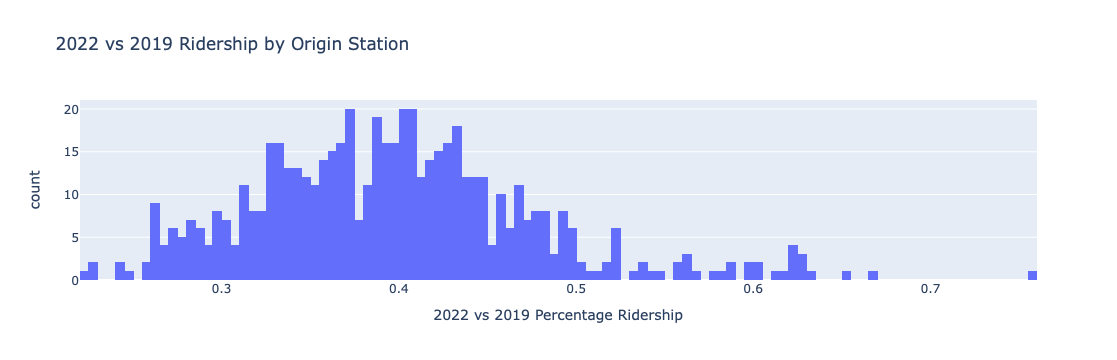

In [480]:
import plotly.graph_objects as go
orig = px.histogram(origin_stations, x="ratio", nbins=120,
             labels={"count":"Number of stations","ratio":"2022 vs 2019 Percentage Ridership"}, 
             title = "2022 vs 2019 Ridership by Origin Station",
             )
orig.show()


#### Destination Analysis¶

In [407]:
destination_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    destination_summary.append(df.groupby(
        ['Year','Month Name','Month','Destination Station'])['Trip Count'].sum().reset_index().sort_values(
        by=['Year','Month']).reset_index().drop(columns = ['index']))
 

In [436]:
destination_stations = destination_summary[0].merge(destination_summary[1][destination_summary[1]['Month']>4], 
                         how = 'left', left_on= ['Month','Destination Station'], right_on = ['Month','Destination Station'], 
                         suffixes = ['_2019','_2022'])
destination_stations = destination_stations.merge(destination_summary[2], 
                         how = 'left', left_on= ['Month','Destination Station'], right_on = ['Month','Destination Station'], 
                         suffixes = ['_2019a','_2023'])
destination_stations.loc[destination_stations['Month'] < 5,'Trip Count_2022'] = destination_stations['Trip Count'][destination_stations['Month'] < 6]
#pd.concat(station_summary).reset_index().groupby(['Year','Month Name','Month','Origin Station'])['Trip Count'].sum().reset_index()
destination_stations = destination_stations[['Year_2019','Month Name_2019','Month','Destination Station','Trip Count_2019','Trip Count_2022']].rename(
    columns={"Year_2019":"Year", "Month Name_2019":"Month Name"})

In [437]:
destination_stations['ratio'] = destination_stations['Trip Count_2022']/destination_stations['Trip Count_2019']
destination_stations

,Year,Month Name,Month,Destination Station,Trip Count_2019,Trip Count_2022,ratio
0,2019,January,1,12TH,323829,96761.0,0.298803
1,2019,January,1,16TH,309847,124733.0,0.402563
2,2019,January,1,19TH,316884,93785.0,0.295960
3,2019,January,1,24TH,300699,121336.0,0.403513
4,2019,January,1,ANTC,70204,37726.0,0.537377
...,...,...,...,...,...,...,...
583,2019,December,12,UCTY,92530,34026.0,0.367729
584,2019,December,12,WARM,89106,23745.0,0.266480
585,2019,December,12,WCRK,139927,52728.0,0.376825
586,2019,December,12,WDUB,76885,25064.0,0.325993


In [438]:
destination_stations = destination_stations.drop(destination_stations[destination_stations['ratio']>1].index)
destination_stations

,Year,Month Name,Month,Destination Station,Trip Count_2019,Trip Count_2022,ratio
0,2019,January,1,12TH,323829,96761.0,0.298803
1,2019,January,1,16TH,309847,124733.0,0.402563
2,2019,January,1,19TH,316884,93785.0,0.295960
3,2019,January,1,24TH,300699,121336.0,0.403513
4,2019,January,1,ANTC,70204,37726.0,0.537377
...,...,...,...,...,...,...,...
583,2019,December,12,UCTY,92530,34026.0,0.367729
584,2019,December,12,WARM,89106,23745.0,0.266480
585,2019,December,12,WCRK,139927,52728.0,0.376825
586,2019,December,12,WDUB,76885,25064.0,0.325993


In [439]:
destination_stations.describe()

,Year,Month,Trip Count_2019,Trip Count_2022,ratio
count,576.0,576.000000,5.760000e+02,576.000000,576.000000
mean,2019.0,6.500000,2.059184e+05,77866.918403,0.397367
std,0.0,3.455053,2.180604e+05,72191.886635,0.076061
min,2019.0,1.000000,2.377700e+04,6853.000000,0.207317
25%,2019.0,3.750000,9.373950e+04,37079.750000,0.341030
50%,2019.0,6.500000,1.402500e+05,53886.500000,0.395743
75%,2019.0,9.250000,2.061175e+05,89232.250000,0.442759
max,2019.0,12.000000,1.245587e+06,399065.000000,0.725428


In [440]:
origin_stations.describe()

,Year,Month,Trip Count_2019,Trip Count_2022,ratio
count,576.0,576.000000,5.760000e+02,576.000000,576.000000
mean,2019.0,6.500000,2.059184e+05,77886.190972,0.396653
std,0.0,3.455053,2.042358e+05,69142.516057,0.079056
min,2019.0,1.000000,2.537100e+04,11535.000000,0.222422
25%,2019.0,3.750000,9.432125e+04,36905.000000,0.341221
50%,2019.0,6.500000,1.397570e+05,54389.000000,0.393166
75%,2019.0,9.250000,2.103608e+05,91010.000000,0.437381
max,2019.0,12.000000,1.039759e+06,352398.000000,0.758224


In [441]:
dratio_mean = destination_stations.describe().loc['mean','ratio']
dratio_std = destination_stations.describe().loc['std','ratio']
print('mean ' + str(dratio_mean))
print('std ' + str(dratio_std))
dmax = dratio_mean + (dratio_std)
print('max ' + str(dmax))
dmin = dratio_mean - (dratio_std)
print('min ' + str(dmin))
# origin_stations[origin_stations['ratio']>1].index

mean 0.39736711982329176
std 0.07606130300083054
max 0.4734284228241223
min 0.32130581682246123


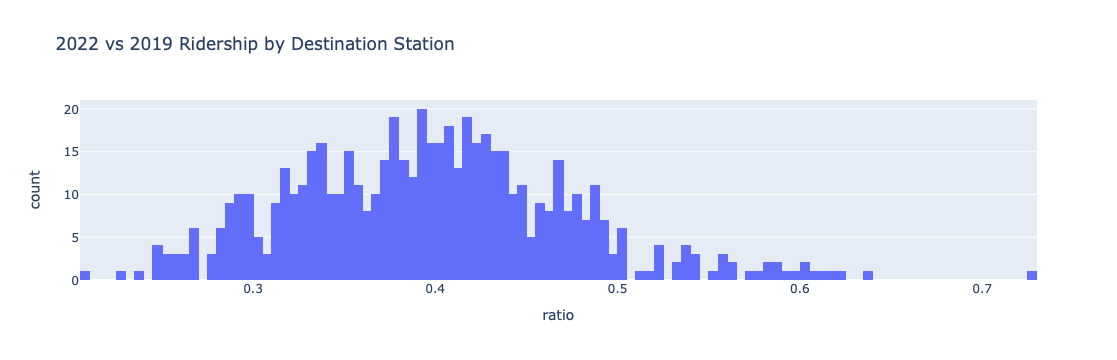

In [478]:
import plotly.graph_objects as go
orig = px.histogram(destination_stations, x="ratio", nbins=120, title = "2022 vs 2019 Ridership by Destination Station")
orig.show()

In [471]:
origin_stations['Type'] = 'Origin Station'
origin_stations.rename(columns={'Origin Station':'Station','Trip Count_2019':'2019: Num of Trips','Trip Count_2022':'2022: Num of Trips'})
# destination_stations['Type'] = 'Destination Station'
# destination_stations
# origin_stations
stations = pd.concat([origin_stations.rename(columns={
    'Origin Station':'Station','Trip Count_2019':'2019: Num of Trips','Trip Count_2022':'2022: Num of Trips'}),
                      destination_stations.rename(columns={'Destination Station':'Station','Trip Count_2019':'2019: Num of Trips','Trip Count_2022':'2022: Num of Trips'})], axis = 0)

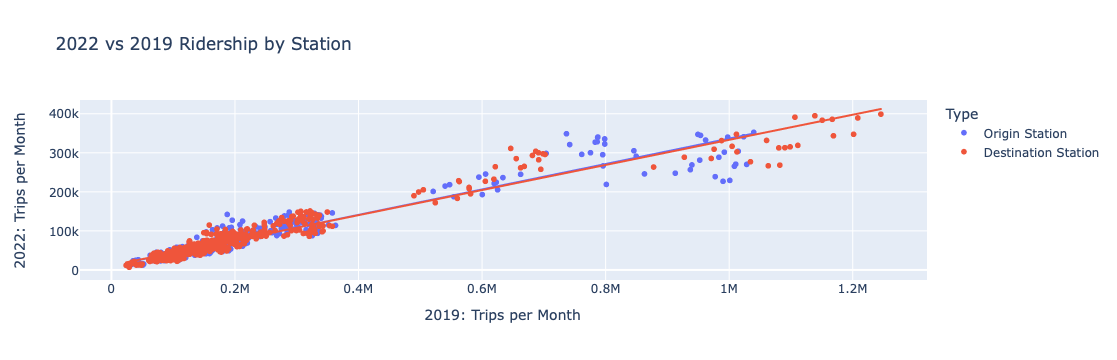

In [484]:
origin_scat = px.scatter(stations, 
                         x="2019: Num of Trips", 
                         y="2022: Num of Trips", 
                         labels={"2019: Num of Trips":"2019: Trips per Month","2022: Num of Trips":"2022: Trips per Month"},
                         trendline="ols", 
                         color = 'Type',
                         hover_data=["Station","Month"],
                         title = "2022 vs 2019 Ridership by Station")
origin_scat.show()

### Station Ranks

In [561]:
tester = origin_stations.groupby('Origin Station')[['Trip Count_2019','Trip Count_2022']].mean()\
[['Trip Count_2019','Trip Count_2022']].round().astype('int')
tester['2019 Rank'] = tester['Trip Count_2019'].rank(ascending = False).astype('int')
tester['2022 Rank'] = tester['Trip Count_2022'].rank(ascending = False).astype('int')
station_rank = tester.sort_values(by='2019 Rank').rename(columns = {'Trip Count_2019':'2019 Avg Monthly Trips',
                                                     'Trip Count_2022':'2022 Avg Monthly Trips'})
station_rank
station_rank['Percentage'] = round(station_rank['2022 Avg Monthly Trips'] / station_rank['2019 Avg Monthly Trips'] * 100,0)
station_rank.head(10)

,2019 Avg Monthly Trips,2022 Avg Monthly Trips,2019 Rank,2022 Rank,Percentage
Origin Station,,,,,
MONT,954394,252415,1,3,26.0
EMBR,947990,317340,2,2,33.0
POWL,771261,321094,3,1,42.0
CIVC,593948,219252,4,4,37.0
16TH,324680,134290,5,5,41.0
19TH,320627,102744,6,10,32.0
12TH,320442,106606,7,9,33.0
24TH,310797,129592,8,6,42.0
DBRK,273844,126269,9,7,46.0


In [563]:
destination_tester = destination_stations.groupby('Destination Station')[['Trip Count_2019','Trip Count_2022']].mean()\
[['Trip Count_2019','Trip Count_2022']].round().astype('int')
destination_tester['2019 Rank'] = destination_tester['Trip Count_2019'].rank(ascending = False).astype('int')
destination_tester['2022 Rank'] = destination_tester['Trip Count_2022'].rank(ascending = False).astype('int')
des_station_rank = destination_tester.sort_values(by='2019 Rank').rename(columns = {'Trip Count_2019':'2019 Avg Monthly Trips',
                                                     'Trip Count_2022':'2022 Avg Monthly Trips'})
des_station_rank
des_station_rank['Percentage'] = round(des_station_rank['2022 Avg Monthly Trips'] / des_station_rank['2019 Avg Monthly Trips'] * 100,0)
des_station_rank.head(10)

,2019 Avg Monthly Trips,2022 Avg Monthly Trips,2019 Rank,2022 Rank,Percentage
Destination Station,,,,,
EMBR,1121678,361510,1,1,32.0
MONT,1026270,295459,2,2,29.0
POWL,675052,284790,3,3,42.0
CIVC,555449,206594,4,4,37.0
12TH,326168,104950,5,8,32.0
16TH,320276,135845,6,5,42.0
19TH,317481,100446,7,10,32.0
24TH,300384,129701,8,6,43.0
DBRK,288302,128440,9,7,45.0


### Downtown Deep Dive

In [ ]:
# destination_summary = []
# for i in [2019, 2022, 2023]:
#     df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
#     df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
#     df['Month'] = df['Date'].dt.month
#     df['Month Name'] = df['Date'].dt.month_name()
#     df['Year'] = df['Date'].dt.year
#     destination_summary.append(df.groupby(
#         ['Year','Month Name','Month','Destination Station'])['Trip Count'].sum().reset_index().sort_values(
#         by=['Year','Month']).reset_index().drop(columns = ['index']))

In [777]:
SF_downton = ['EMBR','MONT','POWL','CIVC']
downtown_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()
    df['Day Num'] = df['Date'].dt.dayofweek
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df = df[(df['Origin Station'].isin(SF_downton)) | (df['Destination Station'].isin(SF_downton))]
    df['Commute'] = df['Hour'].apply(lambda x: 'AM' if 4 < x <13 else 'PM')
    df['Origin_SF'] = df['Origin Station'].apply(SF)
    df['Destination_SF'] = df['Destination Station'].apply(SF)
    df['Transbay'] = df['Origin_SF'] + df['Destination_SF']
    df['Transbay'] = df['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')
    downtown_summary.append(df)

In [778]:
downtown_master = pd.concat([downtown_summary[0],downtown_summary[1][downtown_summary[1]['Month']>5], downtown_summary[2][downtown_summary[2]['Month']<6]])

In [780]:
downtown_master.loc[downtown_master['Year'].isin([2022,2023]),'Year']= 2022

In [781]:
downtown_master

,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Day Num,Month Name,Year,Commute,Origin_SF,Destination_SF,Transbay
4,2019-01-01,0,12TH,CIVC,2,1,Tuesday,1,January,2019,PM,0,1,Y
10,2019-01-01,0,12TH,EMBR,7,1,Tuesday,1,January,2019,PM,0,1,Y
20,2019-01-01,0,12TH,POWL,5,1,Tuesday,1,January,2019,PM,0,1,Y
33,2019-01-01,0,16TH,CIVC,10,1,Tuesday,1,January,2019,PM,1,1,N
40,2019-01-01,0,16TH,EMBR,22,1,Tuesday,1,January,2019,PM,1,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815961,2023-05-02,23,WDUB,CIVC,1,5,Tuesday,1,May,2022,PM,0,1,Y
2815965,2023-05-02,23,WDUB,POWL,1,5,Tuesday,1,May,2022,PM,0,1,Y
2815970,2023-05-02,23,WOAK,CIVC,3,5,Tuesday,1,May,2022,PM,0,1,Y
2815975,2023-05-02,23,WOAK,MONT,2,5,Tuesday,1,May,2022,PM,0,1,Y


In [805]:
alt = downtown_master[downtown_master['Destination Station'].isin(SF_downton)].groupby(
    ['Year','Day Num','Day','Date','Commute'])['Trip Count'].sum().reset_index().groupby(
    ['Year','Day Num','Day','Commute'])['Trip Count'].mean().round().reset_index()
alt

,Year,Day Num,Day,Commute,Trip Count
0,2019,0,Monday,AM,105606.0
1,2019,0,Monday,PM,24990.0
2,2019,1,Tuesday,AM,114579.0
3,2019,1,Tuesday,PM,28641.0
4,2019,2,Wednesday,AM,114866.0
5,2019,2,Wednesday,PM,29283.0
6,2019,3,Thursday,AM,111747.0
7,2019,3,Thursday,PM,31234.0
8,2019,4,Friday,AM,98529.0
9,2019,4,Friday,PM,33476.0


In [806]:
AM_commute = downtown_master[downtown_master['Destination Station'].isin(SF_downton)].groupby(
    ['Year','Day Num','Day','Commute'])['Trip Count'].mean().reset_index()AM_commute

SyntaxError: invalid syntax (1043025506.py, line 2)

In [813]:
AM_commute #Total trips per Commute Period

,Year,Day Num,Day,Commute,Trip Count
0,2019,0,Monday,AM,5491532
1,2019,0,Monday,PM,1299474
2,2019,1,Tuesday,AM,6072669
3,2019,1,Tuesday,PM,1517993
4,2019,2,Wednesday,AM,5973042
5,2019,2,Wednesday,PM,1522698
6,2019,3,Thursday,AM,5810841
7,2019,3,Thursday,PM,1624187
8,2019,4,Friday,AM,5123523
9,2019,4,Friday,PM,1740729


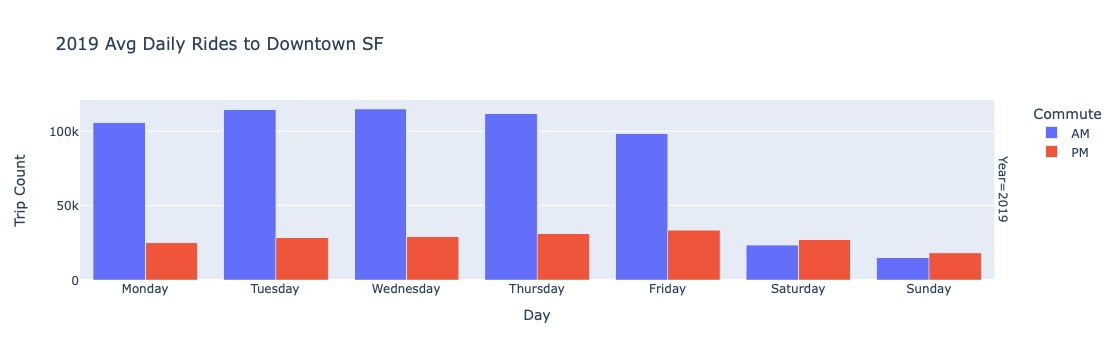

In [828]:
# AM_commute_2019 = AM_commute[AM_commute['Year']==2019]
# AM_commute_2019
# com2019 = px.bar(AM_commute_2019, x = "Day", y = "Trip Count", color = 'Commute', barmode = 'group')
# com2019.show()

AM_commute_2019 = AM_commute[AM_commute['Year']==2019]
AM_commute_2019
com2019 = px.bar(alt[alt['Year']==2019], x = "Day", y = "Trip Count", color = 'Commute', barmode = 'group',facet_row="Year", title = "2019 Avg Daily Rides to Downtown SF")
com2019.show()

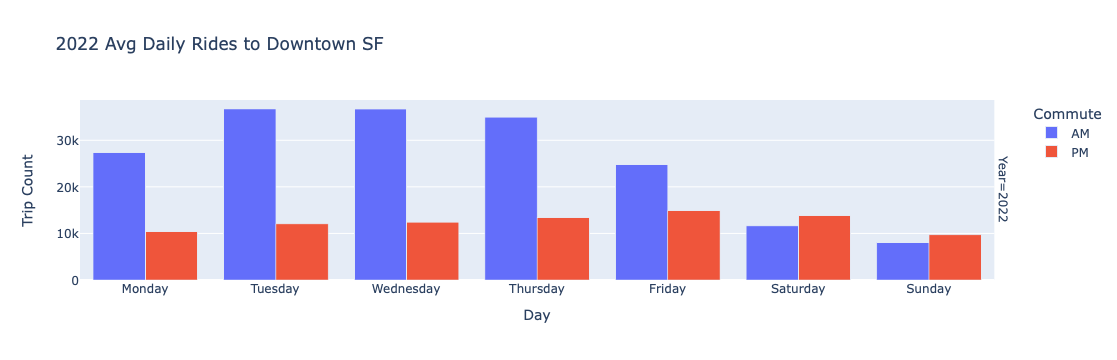

In [830]:
com2022 = px.bar(alt[alt['Year']==2022], x = "Day", y = "Trip Count", color = 'Commute', barmode = 'group',facet_row="Year", title = "2022 Avg Daily Rides to Downtown SF")
com2022.show()

In [764]:


new = px.bar(AM_commmute, x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "new", color = 'Commute', barmode = 'stacked')

# month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
#              y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
#              title = "Drop in Ridership: 2019 to 2023", color = 'Year')
# month.update_xaxes(showticklabels=False)
# month.add_annotation(
#     x="March 2020", y = 4000000,
#     text="March 2020",
#     showarrow=True,
#     xanchor="left")
# #month.add_hline(y=10008025)
new.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'barmode' property of layout
        Received value: 'stacked'

    The 'barmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['stack', 'group', 'overlay', 'relative']

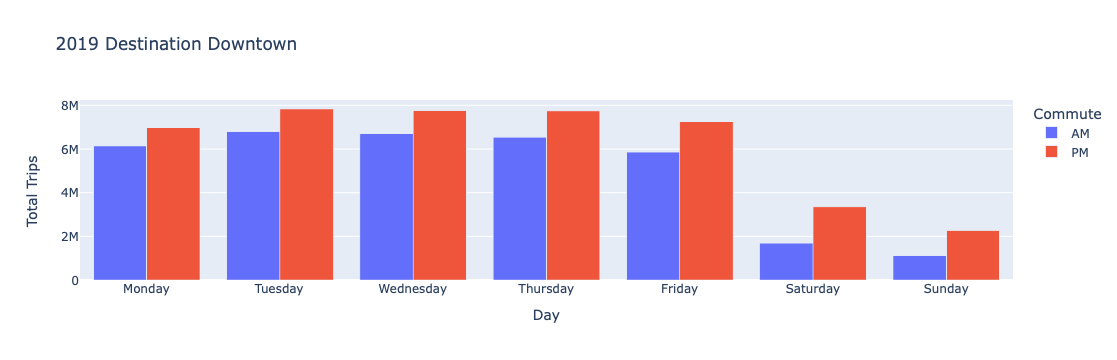

In [759]:
day_chart = px.bar(AM_commmute[AM_commmute['Year'] == 2019], x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "2019 Destination Downtown", color = 'Commute', barmode = 'group')

# month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
#              y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
#              title = "Drop in Ridership: 2019 to 2023", color = 'Year')
# month.update_xaxes(showticklabels=False)
# month.add_annotation(
#     x="March 2020", y = 4000000,
#     text="March 2020",
#     showarrow=True,
#     xanchor="left")
# #month.add_hline(y=10008025)
day_chart.show()

In [667]:
downtown_master

,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Day Num,Month Name,Year,Commute,Origin_SF,Destination_SF,Transbay
4,2019-01-01,0,12TH,CIVC,2,1,Tuesday,1,January,2019,AM,0,1,Y
10,2019-01-01,0,12TH,EMBR,7,1,Tuesday,1,January,2019,AM,0,1,Y
20,2019-01-01,0,12TH,POWL,5,1,Tuesday,1,January,2019,AM,0,1,Y
33,2019-01-01,0,16TH,CIVC,10,1,Tuesday,1,January,2019,AM,1,1,N
40,2019-01-01,0,16TH,EMBR,22,1,Tuesday,1,January,2019,AM,1,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815961,2023-05-02,23,WDUB,CIVC,1,5,Tuesday,1,May,2023,PM,0,1,Y
2815965,2023-05-02,23,WDUB,POWL,1,5,Tuesday,1,May,2023,PM,0,1,Y
2815970,2023-05-02,23,WOAK,CIVC,3,5,Tuesday,1,May,2023,PM,0,1,Y
2815975,2023-05-02,23,WOAK,MONT,2,5,Tuesday,1,May,2023,PM,0,1,Y


In [647]:
bart2022 = pd.read_csv('date-hour-soo-dest-2022.csv')
bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
bart2022['Day'] = bart2022['Date'].dt.day_name()
bart2022['Day Num'] = bart2022['Date'].dt.dayofweek
bart2022['Month Name'] = bart2022['Date'].dt.month_name()
bart2022['Year'] = bart2022['Date'].dt.year

In [648]:
SF_downton = ['EMBR','MONT','POWL','CIVC']
bart2022 = bart2022[(bart2022['Origin Station'].isin(SF_downton)) | (bart2022['Destination Station'].isin(SF_downton))]

In [649]:
SF_stations = ['EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','DALY','COLM','SSAN','SBRN','SFIA','MLBR']

def SF(x):
    if x in SF_stations:
        return 1
    else:
        return 0

bart2022['Commute'] = bart2022['Hour'].apply(lambda x: 'AM' if x <13 else 'PM')
bart2022['Origin_SF'] = bart2022['Origin Station'].apply(SF)
bart2022['Destination_SF'] = bart2022['Destination Station'].apply(SF)
bart2022['Transbay'] = bart2022['Origin_SF'] + bart2022['Destination_SF']
bart2022['Transbay'] = bart2022['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')

In [720]:
bart2022

,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Day Num,Month Name,Year,Commute,Origin_SF,Destination_SF,Transbay
4,2022-01-01,0,12TH,MONT,1,1,Saturday,5,January,2022,AM,0,1,Y
5,2022-01-01,0,12TH,POWL,2,1,Saturday,5,January,2022,AM,0,1,Y
12,2022-01-01,0,16TH,POWL,1,1,Saturday,5,January,2022,AM,1,1,N
23,2022-01-01,0,19TH,POWL,2,1,Saturday,5,January,2022,AM,0,1,Y
31,2022-01-01,0,24TH,MONT,1,1,Saturday,5,January,2022,AM,1,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245354,2022-12-31,23,WDUB,POWL,2,12,Saturday,5,December,2022,PM,0,1,Y
8245360,2022-12-31,23,WOAK,CIVC,3,12,Saturday,5,December,2022,PM,0,1,Y
8245362,2022-12-31,23,WOAK,EMBR,14,12,Saturday,5,December,2022,PM,0,1,Y
8245367,2022-12-31,23,WOAK,MONT,2,12,Saturday,5,December,2022,PM,0,1,Y


In [727]:
downtown_summary[1][downtown_summary[1]['Destination Station']\
.isin(SF_downton)].groupby(['Day Num','Day','Commute'])['Trip Count'].sum().reset_index()

,Day Num,Day,Commute,Trip Count
0,0,Monday,AM,1285033
1,0,Monday,PM,491341
2,1,Tuesday,AM,1651638
3,1,Tuesday,PM,569551
4,2,Wednesday,AM,1683852
5,2,Wednesday,PM,587084
6,3,Thursday,AM,1598924
7,3,Thursday,PM,627307
8,4,Friday,AM,1210733
9,4,Friday,PM,713855


In [728]:
day = bart2022[bart2022['Destination Station'].isin(SF_downton)].groupby(['Day Num','Day','Commute'])['Trip Count'].sum().reset_index()

In [729]:
day

,Day Num,Day,Commute,Trip Count
0,0,Monday,AM,1285033
1,0,Monday,PM,491341
2,1,Tuesday,AM,1651638
3,1,Tuesday,PM,569551
4,2,Wednesday,AM,1683852
5,2,Wednesday,PM,587084
6,3,Thursday,AM,1598924
7,3,Thursday,PM,627307
8,4,Friday,AM,1210733
9,4,Friday,PM,713855


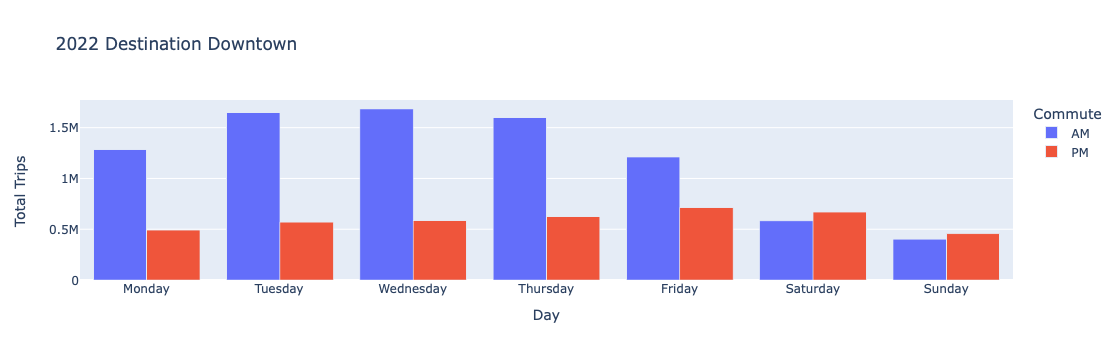

In [656]:
day_chart = px.bar(day, x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "2022 Destination Downtown", color = 'Commute', barmode = 'group')

# month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Date",
#              y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
#              title = "Drop in Ridership: 2019 to 2023", color = 'Year')
# month.update_xaxes(showticklabels=False)
# month.add_annotation(
#     x="March 2020", y = 4000000,
#     text="March 2020",
#     showarrow=True,
#     xanchor="left")
# #month.add_hline(y=10008025)
day_chart.show()

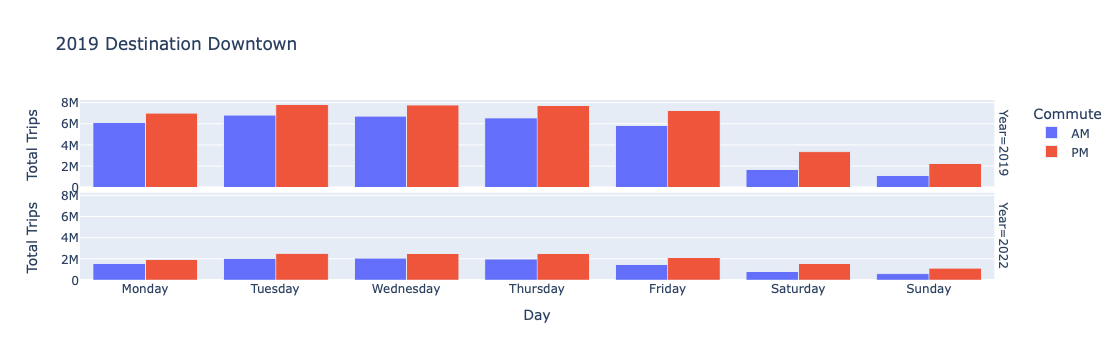

In [718]:
day_facet = px.bar(AM_commmute, x = "Day",
             y='Trip Count',labels={"Trip Count" : "Total Trips"},
             title = "2019 Destination Downtown", color = 'Commute', barmode = 'group', facet_row="Year")
day_facet.show()

In [302]:
station_summary[0][(station_summary[0]['Month'] == 7)]

,Year,Month Name,Month,Origin Station,Trip Count
288,2019,July,7,12TH,327809
289,2019,July,7,16TH,331603
290,2019,July,7,19TH,324870
291,2019,July,7,24TH,311225
292,2019,July,7,ANTC,71149
293,2019,July,7,ASHB,128142
294,2019,July,7,BALB,267678
295,2019,July,7,BAYF,131022
296,2019,July,7,BERY,40
297,2019,July,7,CAST,70198


In [257]:
bart2022.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day,Month Name
8245365,2022-12-31,23,WOAK,MCAR,1,12,2022,5,December
8245366,2022-12-31,23,WOAK,MLBR,1,12,2022,5,December
8245367,2022-12-31,23,WOAK,MONT,2,12,2022,5,December
8245368,2022-12-31,23,WOAK,POWL,9,12,2022,5,December
8245369,2022-12-31,23,WOAK,SBRN,1,12,2022,5,December


In [15]:
bart2022 = pd.read_csv('date-hour-soo-dest-2022.csv')

In [253]:
datetime_object = datetime.strptime('05/31/22', '%m/%d/%y')
datetime_object

datetime.datetime(2022, 5, 31, 0, 0)

In [245]:
bart2022 = bart2022[bart2022['Date'] > datetime_object]

In [246]:
bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
bart2022['Month Name'] = bart2022['Date'].dt.month_name()
bart2022['Year'] = bart2022['Date'].dt.year

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_26387/4187686014.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_26387/4187686014.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_26387/4187686014.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [248]:
bart2022.groupby('Origin Station')['Trip Count'].sum()
bart2022.groupby('Destination Station')['Trip Count'].sum()

Destination Station
12TH     731145
16TH     955629
19TH     688915
24TH     903415
ANTC     289059
ASHB     305679
BALB     638943
BAYF     427782
BERY     224167
CAST     189401
CIVC    1472803
COLM     261040
COLS     480703
CONC     376969
DALY     709604
DBRK     904427
DELN     599486
DUBL     445184
EMBR    2570784
FRMT     294266
FTVL     635968
GLEN     486007
HAYW     344686
LAFY     220971
LAKE     506164
MCAR     582873
MLBR     335212
MLPT     179089
MONT    2069653
NBRK     275819
NCON      98659
OAKL     135073
ORIN     170453
PCTR      92725
PHIL     358608
PITT     292779
PLZA     326106
POWL    2032631
RICH     369416
ROCK     362762
SANL     492598
SBRN     244105
SFIA     691696
SHAY     221374
SSAN     216521
UCTY     270249
WARM     185831
WCRK     403158
WDUB     190099
WOAK     543913
Name: Trip Count, dtype: int64

In [17]:
#Features

#Datetime

bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
bart2022['Year'] = bart2022['Date'].dt.year
#bart2022['Week'] = bart2022['Date'].dt.week
# sample['Year'] = sample['Date'].dt.year
#bart2022['Day'] = bart2022['Date'].dt.dayofweek

,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day
0,2022-01-01,0,12TH,12TH,1,1,2022,5
1,2022-01-01,0,12TH,16TH,1,1,2022,5
2,2022-01-01,0,12TH,24TH,2,1,2022,5
3,2022-01-01,0,12TH,ASHB,1,1,2022,5
4,2022-01-01,0,12TH,MONT,1,1,2022,5
...,...,...,...,...,...,...,...,...
8245365,2022-12-31,23,WOAK,MCAR,1,12,2022,5
8245366,2022-12-31,23,WOAK,MLBR,1,12,2022,5
8245367,2022-12-31,23,WOAK,MONT,2,12,2022,5
8245368,2022-12-31,23,WOAK,POWL,9,12,2022,5


In [33]:
bart2022.groupby(['Year','Month'])['Trip Count'].sum().reset_index()

,Year,Month,Trip Count
0,2022,1,2220863
1,2022,2,2558265
2,2022,3,3388485
3,2022,4,3421101
4,2022,5,3593434
5,2022,6,3800420
6,2022,7,3493579
7,2022,8,3991651
8,2022,9,4180197
9,2022,10,4187488


In [23]:
master = []
#master[0] = bart2022.groupby('Month')['Trip Count'].sum().reset_index()

In [34]:
master.append(bart2022.groupby(['Year','Month'])['Trip Count'].sum().reset_index())

In [35]:
master

[    Month  Trip Count
 0       1     2220863
 1       2     2558265
 2       3     3388485
 3       4     3421101
 4       5     3593434
 5       6     3800420
 6       7     3493579
 7       8     3991651
 8       9     4180197
 9      10     4187488
 10     11     3747639
 11     12     3403625,
     Month  Trip Count
 0       1     2220863
 1       2     2558265
 2       3     3388485
 3       4     3421101
 4       5     3593434
 5       6     3800420
 6       7     3493579
 7       8     3991651
 8       9     4180197
 9      10     4187488
 10     11     3747639
 11     12     3403625,
     Year  Month  Trip Count
 0   2022      1     2220863
 1   2022      2     2558265
 2   2022      3     3388485
 3   2022      4     3421101
 4   2022      5     3593434
 5   2022      6     3800420
 6   2022      7     3493579
 7   2022      8     3991651
 8   2022      9     4180197
 9   2022     10     4187488
 10  2022     11     3747639
 11  2022     12     3403625]

In [30]:
df = pd.concat(master)
df

,Month,Trip Count
0,1,2220863
1,2,2558265
2,3,3388485
3,4,3421101
4,5,3593434
5,6,3800420
6,7,3493579
7,8,3991651
8,9,4180197
9,10,4187488


1

In [28]:
bart2022['Origin_SF'] = bart2022['Origin Station'].apply(SF)
bart2022['Destination_SF'] = bart2022['Destination Station'].apply(SF)
bart2022['Direction'] = (bart2022['Origin_SF']) - bart2022['Destination_SF']

In [29]:
bart2022

,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Origin_SF,Destination_SF,Direction
0,0,0,2022-01-01,0,12TH,12TH,1,1,5,0,0,0
1,1,1,2022-01-01,0,12TH,16TH,1,1,5,0,1,-1
2,2,2,2022-01-01,0,12TH,24TH,2,1,5,0,1,-1
3,3,3,2022-01-01,0,12TH,ASHB,1,1,5,0,0,0
4,4,4,2022-01-01,0,12TH,MONT,1,1,5,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8245365,8245365,8245365,2022-12-31,23,WOAK,MCAR,1,12,5,0,0,0
8245366,8245366,8245366,2022-12-31,23,WOAK,MLBR,1,12,5,0,1,-1
8245367,8245367,8245367,2022-12-31,23,WOAK,MONT,2,12,5,0,1,-1
8245368,8245368,8245368,2022-12-31,23,WOAK,POWL,9,12,5,0,1,-1


In [32]:
print(str(bart2022['Direction'].sum()) + ' more trips leaving SF than entering SF over the course of 2022.')
bart2022['Direction'].sum()

53190 more trips leaving SF than entering SF over the course of 2022.


53190

In [41]:
bart2022[(bart2022['Hour'] >= 0) & (bart2022['Hour'] <=12)]['Direction'].sum()
commute = bart2022[(bart2022['Hour'] >= 0) & (bart2022['Hour'] <=12)].groupby(['Day'])['Direction'].sum(
    ).reset_index().rename(columns={'Direction':'Morning Activity'})
commute['Afternoon Activity'] = bart2022[(bart2022['Hour'] > 12) & (bart2022['Hour'] <24)].groupby(['Day'])['Direction'].sum(
    )
print('Negative values reflect East Bay to SF directionality. Positive values show SF to East Bay directionality.')
commute

Negative values reflect East Bay to SF directionality. Positive values show SF to East Bay directionality.


,Day,Morning Activity,Afternoon Activity
0,0,-33278,38250
1,1,-35007,42513
2,2,-34799,42771
3,3,-32649,41416
4,4,-30460,33878
5,5,-10829,19063
6,6,-465,12786


<Axes: >

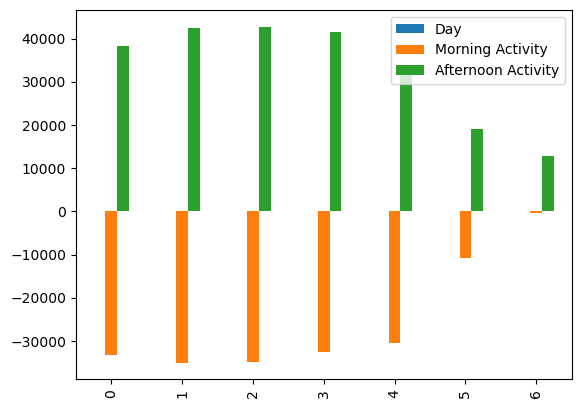

In [43]:
commute.plot.bar()

In [38]:
bart2022[(bart2022['Hour'] > 12) & (bart2022['Hour'] <24)].groupby(['Day'])['Direction'].sum(
    )#.reset_index()

Day
0    38250
1    42513
2    42771
3    41416
4    33878
5    19063
6    12786
Name: Direction, dtype: int64

<Axes: xlabel='Month'>

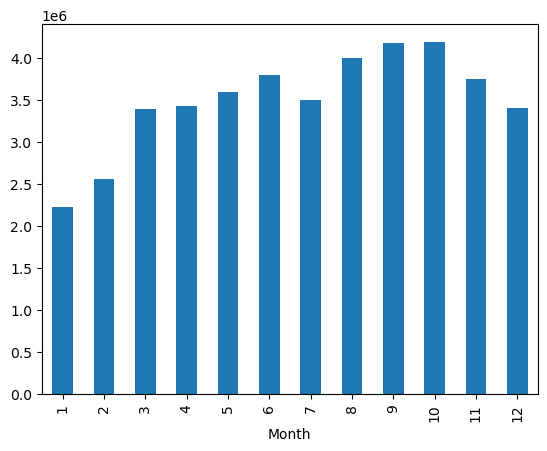

In [17]:
bart2022.groupby('Month')['Trip Count'].sum().plot.bar()

<Axes: xlabel='Day'>

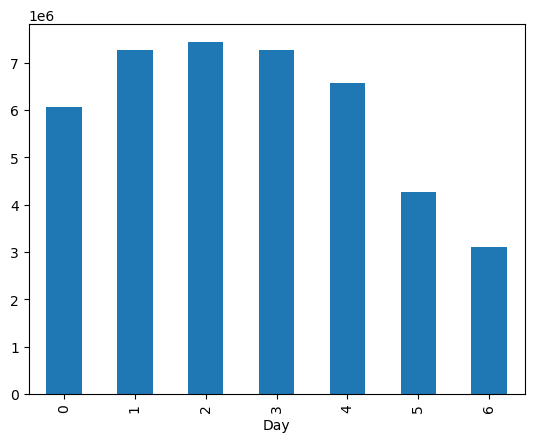

In [18]:
bart2022.groupby('Day')['Trip Count'].sum().plot.bar()

<Axes: xlabel='Origin Station'>

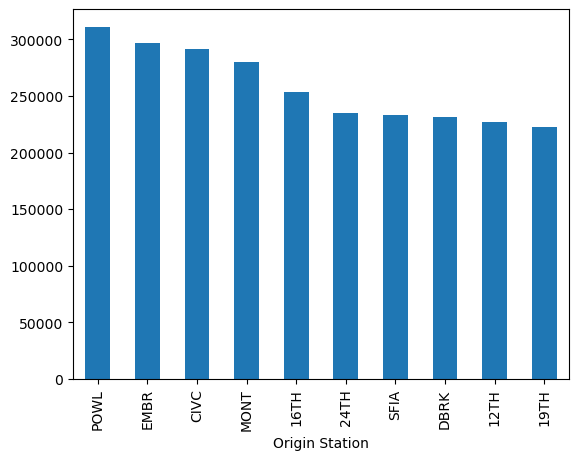

In [24]:
bart2022['Origin Station'].value_counts().plot.bar()
bart2022['Origin Station'].value_counts().head(10).plot.bar()

<Axes: xlabel='Destination Station'>

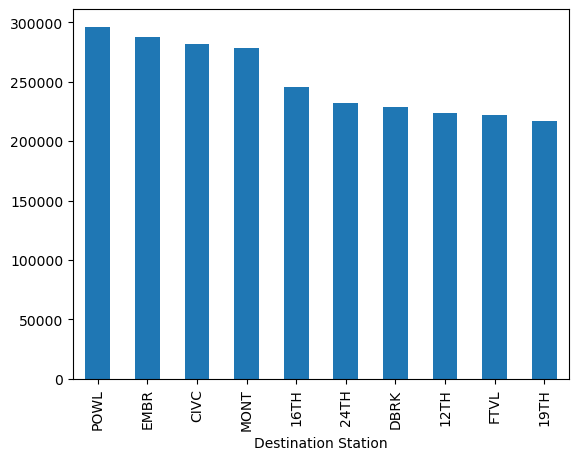

In [25]:
bart2022['Destination Station'].value_counts().plot.bar()
bart2022['Destination Station'].value_counts().head(10).plot.bar()

##### Import 2011 - 2023

In [6]:
test = list(range(2021,2024,1))

bart_summary = []
for i in test:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
#process within the loop
    bart = pd.concat([bart,df], axis = 0)
    bart_summary.append(#df)

pd.concat(bart_summary)
#summarize, concatenate and save the output as variable


In [46]:
bart2019 = pd.read_csv('date-hour-soo-dest-2019.csv')

In [47]:
bart2020 = pd.read_csv('date-hour-soo-dest-2020.csv')

In [48]:
bart2021 = pd.read_csv('date-hour-soo-dest-2021.csv')

In [49]:
bart2023 = pd.read_csv('date-hour-soo-dest-2023.csv')

In [51]:
bart19_23 = pd.concat([bart2019,bart2020,bart2021,bart2023], axis = 0)

In [57]:
bart19_23['Date'] = pd.to_datetime(bart19_23['Date'], format = '%Y-%m-%d')
bart19_23['Month'] = bart19_23['Date'].dt.month
bart19_23['Year'] = bart19_23['Date'].dt.year
bart19_23['Day'] = bart19_23['Date'].dt.dayofweek
bart19_23 = bart19_23.reset_index()
bart19_23

ValueError: cannot insert level_0, already exists

In [59]:
bart19_23['Year'] = bart19_23['Date'].dt.year
bart19_23

,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Year
0,0,0,2019-01-01,0,12TH,12TH,3,1,1,2019
1,1,1,2019-01-01,0,12TH,16TH,4,1,1,2019
2,2,2,2019-01-01,0,12TH,ANTC,1,1,1,2019
3,3,3,2019-01-01,0,12TH,BAYF,1,1,1,2019
4,4,4,2019-01-01,0,12TH,CIVC,2,1,1,2019
...,...,...,...,...,...,...,...,...,...,...
25340189,25340189,2815977,2023-05-02,23,WOAK,PLZA,2,5,1,2023
25340190,25340190,2815978,2023-05-02,23,WOAK,POWL,3,5,1,2023
25340191,25340191,2815979,2023-05-02,23,WOAK,RICH,2,5,1,2023
25340192,25340192,2815980,2023-05-02,23,WOAK,SANL,1,5,1,2023


<Axes: xlabel='Year,Month'>

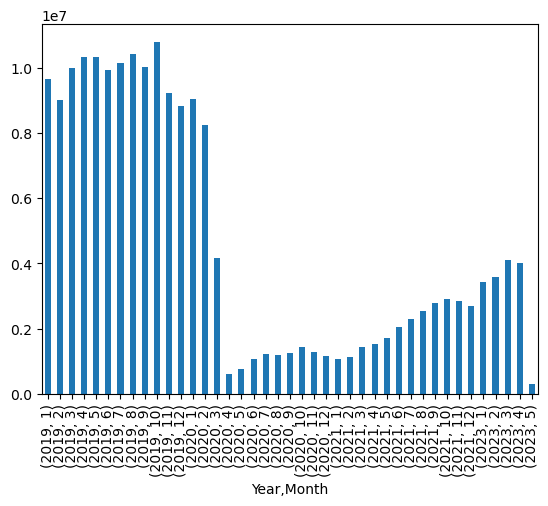

In [60]:
bart19_23.groupby(['Year','Month'])['Trip Count'].sum().plot.bar()

In [8]:
bart.isna().sum() # no missing data

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [9]:
print('Data is not missing values. First date in range: ' + str(bart['Date'].min()) + '. Last date in range: ' + str(bart['Date'].max()) + '. Total number of records: ' + str(bart.shape[0]))
print('There are ' + str(bart['Destination Station'].value_counts().shape[0]) + ' stations.')
print(str(bart[['Hour']].value_counts().shape[0]) + ' hours of origin represented, although not in every year.')

Data is not missing values. First date in range: 2011-01-01. Last date in range: 2023-05-02. Total number of records: 112536132
There are 50 stations.
24 hours of origin represented, although not in every year.


In [10]:
#Sample for Feature Engineering

random.seed(0)
sample = bart.sample(10)

In [146]:
print(sample['Date'].dtype)
sample[['Date']]
# sample['Date'].iloc[1]
sample


object


,Date,Hour,Origin Station,Destination Station,Trip Count
3917712,2016-05-23,7,PLZA,FRMT,8
6967591,2011-09-25,23,COLS,BALB,1
6105753,2013-08-20,7,19TH,BAYF,7
5408197,2012-07-21,19,WCRK,COLS,2
8911885,2019-11-16,16,ROCK,DALY,1
43261,2021-01-05,8,FRMT,BAYF,2
6435302,2018-08-19,17,SANL,MONT,10
827947,2020-02-02,0,BAYF,DUBL,1
8592327,2019-11-05,12,NBRK,SFIA,9
2102337,2018-03-19,16,MCAR,NCON,5


In [147]:
sample['Date'].astype

<bound method NDFrame.astype of 3917712    2016-05-23
6967591    2011-09-25
6105753    2013-08-20
5408197    2012-07-21
8911885    2019-11-16
43261      2021-01-05
6435302    2018-08-19
827947     2020-02-02
8592327    2019-11-05
2102337    2018-03-19
Name: Date, dtype: object>

In [12]:
#Converting to datetime and extracting days week month.

sample['Date'] = pd.to_datetime(sample['Date'], format = '%Y-%m-%d')
sample['Date'].dtype
sample['Month'] = sample['Date'].dt.month
sample['Year'] = sample['Date'].dt.year
sample['Day'] = sample['Date'].dt.dayofweek
sample = sample.reset_index()
sample


,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day
0,0,8695417,2018-11-06,6,PCTR,SFIA,2,11,2018,1
1,1,5138090,2013-07-15,9,MONT,DELN,10,7,2013,0
2,2,316182,2019-01-12,18,DELN,GLEN,1,1,2019,5
3,3,3721576,2017-05-18,19,DBRK,DALY,8,5,2017,3
4,4,7640532,2022-12-04,13,FRMT,BALB,1,12,2022,6
5,5,2207146,2019-03-22,6,COLS,DALY,3,3,2019,4
6,6,7216693,2013-09-29,10,UCTY,COLM,1,9,2013,6
7,7,1660711,2019-03-02,10,19TH,EMBR,38,3,2019,5
8,8,3561288,2021-08-08,21,MONT,RICH,4,8,2021,6
9,9,3756884,2018-05-18,6,CAST,DBRK,1,5,2018,4


In [ ]:
bart['Date'] = pd.to_datetime(bart['Date'], format = '%Y-%m-%d')
bart['Month'] = bart['Date'].dt.month
bart['Year'] = bart['Date'].dt.year
bart['Day'] = bart['Date'].dt.dayofweek
bart = bart.reset_index()
bart

In [167]:
#Basic Stats - Total trips per year, overall trend in ridership

sample.groupby('Year')['Trip Count'].sum().reset_index()
sample.groupby(['Year','Month'])['Trip Count'].sum().reset_index().sort_values(by='Month')


,Year,Month,Trip Count
8,2021,1,2
7,2020,2,1
4,2018,3,5
3,2016,5,8
1,2012,7,2
2,2013,8,7
5,2018,8,10
0,2011,9,1
6,2019,11,10


In [173]:
#busiest stations
sample_trips = sample.groupby(['Origin Station'])['Trip Count'].sum().reset_index().sort_values(by='Origin Station').merge(
sample.groupby(['Destination Station'])['Trip Count'].sum().reset_index().sort_values(by='Destination Station'),how = "outer", left_on = "Origin Station",
right_on = 'Destination Station')
sample_trips['Total_Trips'] = sample_trips['Trip Count_x'] = sample_trips['Trip Count_y']
sample_trips


,Origin Station,Trip Count_x,Destination Station,Trip Count_y,Total_Trips
0,19TH,NaN,NaN,NaN,NaN
1,NaN,1.0,BALB,1.0,1.0
2,BAYF,9.0,BAYF,9.0,9.0
3,COLS,2.0,COLS,2.0,2.0
4,NaN,1.0,DALY,1.0,1.0
5,NaN,1.0,DUBL,1.0,1.0
6,FRMT,8.0,FRMT,8.0,8.0
7,MCAR,NaN,NaN,NaN,NaN
8,NaN,10.0,MONT,10.0,10.0
9,NBRK,NaN,NaN,NaN,NaN


## Possible Questions:

1. Where should my client open their coffee chain? What are the highest traffic areas?
2. How where should I be increasing train cars and frequency of routes?
3. If we had to cut operating hours due to low ridership, which routes would we keep and when? 
4. Are there any good candidates for express trains? express services?
5. I want to place targeted ads in Bart -- which stations will give me the most exposure?

Over Time
1. What are the biggest trends in ridership? Any need to decrease routes?
2. What was the impact of Covid shelter in place on BART? How have we bounced back? 
3. Has ridership changed with the growth of with Uber and Lyft? What routes remain impervious?
4. If ridership has decreased over time, which statiosn are in need of revitalizing?

In [226]:
sample

,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day
0,3917712,2016-05-23,7,PLZA,FRMT,8,5,2016,0
1,6967591,2011-09-25,23,COLS,BALB,1,9,2011,6
2,6105753,2013-08-20,7,19TH,BAYF,7,8,2013,1
3,5408197,2012-07-21,19,WCRK,COLS,2,7,2012,5
4,8911885,2019-11-16,16,ROCK,DALY,1,11,2019,5
5,43261,2021-01-05,8,FRMT,BAYF,2,1,2021,1
6,6435302,2018-08-19,17,SANL,MONT,10,8,2018,6
7,827947,2020-02-02,0,BAYF,DUBL,1,2,2020,6
8,8592327,2019-11-05,12,NBRK,SFIA,9,11,2019,1
9,2102337,2018-03-19,16,MCAR,NCON,5,3,2018,0


In [235]:
sample

,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day,Origin_SF,Destination_SF,Direction
0,3917712,2016-05-23,7,PLZA,FRMT,8,5,2016,0,0,0,0
1,6967591,2011-09-25,23,COLS,BALB,1,9,2011,6,0,1,-1
2,6105753,2013-08-20,7,19TH,BAYF,7,8,2013,1,0,0,0
3,5408197,2012-07-21,19,WCRK,COLS,2,7,2012,5,0,0,0
4,8911885,2019-11-16,16,ROCK,DALY,1,11,2019,5,0,1,-1
5,43261,2021-01-05,8,FRMT,BAYF,2,1,2021,1,0,0,0
6,6435302,2018-08-19,17,SANL,MONT,10,8,2018,6,0,1,-1
7,827947,2020-02-02,0,BAYF,DUBL,1,2,2020,6,0,0,0
8,8592327,2019-11-05,12,NBRK,SFIA,9,11,2019,1,0,1,-1
9,2102337,2018-03-19,16,MCAR,NCON,5,3,2018,0,0,0,0


## Deprecated

In [236]:
stations
pass

In [207]:
red = pd.DataFrame([[1, '16',0],[2,'24',0],[3,'GP',1],[4,'BP',0]], columns=['Stop', 'Station', 'Transfer'])
red

blue = pd.DataFrame([[1, 'AA',0],[2,'BB',0],[3,'GP',1],[4,'DD',0]], columns=['Stop', 'Station', 'Transfer'])
blue.reset_index()

,index,Stop,Station,Transfer
0,0,1,AA,0
1,1,2,BB,0
2,2,3,GP,1
3,3,4,DD,0


In [214]:
red_single = ['16','BP']
if (red_single[0] in list(red['Station'])) & (red_single[1] in list(red['Station'])):
    print(abs(red.loc[red['Station'] == red_single[0]].index.tolist()[0]-red.loc[red['Station'] == red_single[1]].index.tolist()[0]))

3


In [209]:
red

,Stop,Station,Transfer
0,1,16,0
1,2,24,0
2,3,GP,1
3,4,BP,0


In [212]:
abs(red.loc[red['Station'] == 'BP'].index.tolist()[0]-red.loc[red['Station'] == '24'].index.tolist()[0])


2

In [205]:
'BP' in list(red['Station'])

True